# Phase 4 Project Submission

- Student name: Lucas Wilkerson
- Student pace: Flex/part time
- Scheduled project review date/time:
- Instructor name: Morgan Jones


# Pneumonia Detection and Classification

## Project Overview




## Business Problem and Stakeholder



#import libraries


import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import tensorflow.keras as keras

from keras import models 
from keras import layers
from keras import optimizers 

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer


import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

import warnings
warnings.filterwarnings("ignore", message="`np.object`")


## Data Understanding

# Don't for get to check distribution, check for duplicates, nans
# get statistics if needed/useful 


# Define paths to import data
train_dir = 'chest_xray/train/'
val_dir = 'chest_xray/val/'
test_dir = 'chest_xray/test/'

train_normal_count = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
train_pneumonia_count = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
val_normal_count = len(os.listdir(os.path.join(val_dir, 'NORMAL')))
val_pneumonia_count = len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))
test_normal_count = len(os.listdir(os.path.join(test_dir, 'NORMAL')))
test_pneumonia_count = len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))

print("Train Data:")
print(f"Normal Images: {train_normal_count}")
print(f"Pneumonia Images: {train_pneumonia_count}")

print("\nValidation Data:")
print(f"Normal Images: {val_normal_count}")
print(f"Pneumonia Images: {val_pneumonia_count}")

print("\nTest Data:")
print(f"Normal Images: {test_normal_count}")
print(f"Pneumonia Images: {test_pneumonia_count}")

## Data Preparation/ Preprocessing

## Data Analysis/ Data Visualization

## Modeling

## Hyperparamater Tuning 

## Model Evaluation

## Conclusion and Recommendations

## Limitations

# Initial shallow neural network model

In [1]:
#Starting by building a shallow neural network

#importing necessary packages

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
import numpy as np
import os

In [5]:
# Directory path
train_dir = 'chest_xray/train/'
test_dir = 'chest_xray/test/'
val_dir = 'chest_xray/val/'

# Get all the data in the directory chest_xray/test (624 images) , and reshape them
test_generator = ImageDataGenerator().flow_from_directory(
        test_dir, 
        target_size=(150, 150), batch_size=624)

# Get all the data in the directory chest_xray/train (5216 images) and reshape them
train_generator = ImageDataGenerator().flow_from_directory(
        train_dir, 
        target_size=(150, 150), batch_size=5216)

# Get all the data in the directory chest_xray/val (16 images), and reshape them
val_generator = ImageDataGenerator().flow_from_directory(
        val_dir, 
        target_size=(150, 150), batch_size=16)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

Found 624 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## Inspect and Prepare Data

### Viewing some images from the datasets 

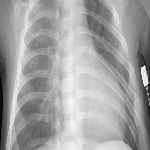

In [6]:
# Datasets are now six numpy arrays 

# Viewing image from train group

array_to_img(train_images[10])

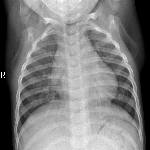

In [7]:
array_to_img(train_images[130])

In [8]:
# Getting the shape of the data

print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))
print(np.shape(val_images))
print(np.shape(val_labels))

(5216, 150, 150, 3)
(5216, 2)
(624, 150, 150, 3)
(624, 2)
(16, 150, 150, 3)
(16, 2)


In [9]:
# Reshaping the train_images
train_img_unrow = train_images.reshape(5216, -1).T

#Previewing the shape of the train_img_unrow

np.shape(train_img_unrow)

(67500, 5216)

In [10]:
# Reshaping test_images
m = 624
test_img_unrow = test_images.reshape(m, -1).T

# Previewing the shape of test_img_unrow
np.shape(test_img_unrow)

(67500, 624)

In [11]:
# Reshaping val_images
val_img_unrow = val_images.reshape(16, -1).T

# Previewing the shape of test_img_unrow
np.shape(val_img_unrow)

(67500, 16)

In [12]:
# Viewing test_labels, train_labels, val_labels
train_labels

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [13]:
# Viewing class indices
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [14]:
# Reshaping train labels
train_labels_final = train_labels.T[[1]]
np.shape(train_labels_final)

(1, 5216)

In [15]:
# Reshaping test labels
test_labels_final = test_labels.T[[1]]
np.shape(test_labels_final)

(1, 624)

In [16]:
# Reshaping val labels
val_labels_final = val_labels.T[[1]]
np.shape(val_labels_final)

(1, 16)

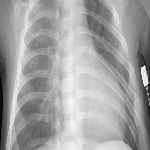

In [18]:
# Checking/ previewing image with label

array_to_img(train_images[10])



In [19]:
train_labels_final[:,10]

array([1.], dtype=float32)

## Standardize the data


In [ ]:
#Remember that each RGB pixel in an image takes a value between 0 and 255. 
#In Deep Learning, it is very common to standardize and/or center your dataset. 
#For images, a common thing that is done is to make sure each pixel value is between 0 and 1. 
#This can be done by dividing the entire matrix by 255. 

In [20]:
# Standardizing the data

train_img_final = train_img_unrow/255
test_img_final = test_img_unrow/255
val_img_final = val_img_unrow/255

type(test_img_unrow)

numpy.ndarray

## Building Basic Logistic Regression-Based Neural Network

In [21]:
# Initializing b as a scalar with the value of 0
b = 0

# Initializing w by defining a function

def init_w(n):
    w = np.zeros((n, 1))
    return w


w = init_w(150*150*3)

In [22]:
# Forward Propagation

def propagation(w, b, x, y):
    l = x.shape[1]
    y_hat = 1/(1 + np.exp(- (np.dot(w.T, x) + b)))                                  
    cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))    
    dw = (1/l) * np.dot(x,(y_hat - y).T)
    db = (1/l) * np.sum(y_hat - y)
    return dw, db, cost


In [24]:
# Running function on train dataset
dw, db, cost = propagation(w, b, train_img_final, train_labels_final)

print(dw)

print(db)

print(cost)

[[-0.05110181]
 [-0.05110181]
 [-0.05110181]
 ...
 [-0.02937868]
 [-0.02937868]
 [-0.02937868]]
-0.2429064417177914
0.6931471805599453


In [25]:
# Optimization
# Update w and b 

# Defining optimization function

def optimization(w, b, x, y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        dw, db, cost = propagation(w, b, x, y)    
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # Record the costs and print them every 50 iterations
        if i % 50 == 0:
            costs.append(cost)
        if print_cost and i % 50 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    return w, b, costs

In [26]:
# Running optimization function
w, b, costs = optimization(w, b, train_img_final, train_labels_final, 
                           num_iterations= 151, learning_rate = 0.0001, print_cost = True)

Cost after iteration 0: 0.693147


KeyboardInterrupt: 